In [1]:
!pip install mxnet-cu100

In [0]:
import mxnet as mx
from mxnet import nd, autograd
import matplotlib.pyplot as plt

ctx = mx.gpu()

##Reading the data from text file

In [3]:
with open('text.txt') as file:
    text = file.read()

print(text)

Artificial intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the acquisition of information and rules for using the information), reasoning (using rules to reach approximate or definite conclusions) and self-correction.
Particular applications of AI include expert systems, speech recognition and machine vision. Artificial intelligence (AI), the ability of a digital computer or computer-controlled robot to perform tasks commonly associated with intelligent beings. The term is frequently applied to the project of developing systems endowed with the intellectual processes characteristic of humans, such as the ability to reason, discover meaning, generalize, or learn from past experience. Since the development of the digital computer in the 1940s, it has been demonstrated that computers can be programmed to carry out very complex tasks—as, for example, discovering proofs for mathematical theorems 

In [4]:
characters = list(set(text))
vocab_length = len(characters)
print(characters)
print(f'Number of unique characters: {vocab_length}')

['y', 'h', '1', 'b', 'A', 'u', '?', ':', 'R', 'S', 'V', 'N', 'I', 'c', 'l', 'C', 'K', 'E', 'x', '9', ')', 'i', '—', "'", '.', 'd', '(', 'r', 'z', 'M', 'n', 'p', 'W', 'P', 't', ' ', 'G', 'T', 'e', '“', '”', 'L', 'U', 'j', ';', 'O', 's', 'B', '-', 'g', 'o', ',', '’', 'f', 'H', 'w', '4', 'é', 'v', '0', 'k', 'D', 'a', 'F', '\n', 'm', 'q']
Number of unique characters: 67


In [5]:
char_to_int = dict([(char, i) for i, char in enumerate(characters)])
char_to_int

{'\n': 64,
 ' ': 35,
 "'": 23,
 '(': 26,
 ')': 20,
 ',': 51,
 '-': 48,
 '.': 24,
 '0': 59,
 '1': 2,
 '4': 56,
 '9': 19,
 ':': 7,
 ';': 44,
 '?': 6,
 'A': 4,
 'B': 47,
 'C': 15,
 'D': 61,
 'E': 17,
 'F': 63,
 'G': 36,
 'H': 54,
 'I': 12,
 'K': 16,
 'L': 41,
 'M': 29,
 'N': 11,
 'O': 45,
 'P': 33,
 'R': 8,
 'S': 9,
 'T': 37,
 'U': 42,
 'V': 10,
 'W': 32,
 'a': 62,
 'b': 3,
 'c': 13,
 'd': 25,
 'e': 38,
 'f': 53,
 'g': 49,
 'h': 1,
 'i': 21,
 'j': 43,
 'k': 60,
 'l': 14,
 'm': 65,
 'n': 30,
 'o': 50,
 'p': 31,
 'q': 66,
 'r': 27,
 's': 46,
 't': 34,
 'u': 5,
 'v': 58,
 'w': 55,
 'x': 18,
 'y': 0,
 'z': 28,
 'é': 57,
 '—': 22,
 '’': 52,
 '“': 39,
 '”': 40}

In [6]:
int_to_char = dict([(i, char) for i, char in enumerate(characters)])
int_to_char

{0: 'y',
 1: 'h',
 2: '1',
 3: 'b',
 4: 'A',
 5: 'u',
 6: '?',
 7: ':',
 8: 'R',
 9: 'S',
 10: 'V',
 11: 'N',
 12: 'I',
 13: 'c',
 14: 'l',
 15: 'C',
 16: 'K',
 17: 'E',
 18: 'x',
 19: '9',
 20: ')',
 21: 'i',
 22: '—',
 23: "'",
 24: '.',
 25: 'd',
 26: '(',
 27: 'r',
 28: 'z',
 29: 'M',
 30: 'n',
 31: 'p',
 32: 'W',
 33: 'P',
 34: 't',
 35: ' ',
 36: 'G',
 37: 'T',
 38: 'e',
 39: '“',
 40: '”',
 41: 'L',
 42: 'U',
 43: 'j',
 44: ';',
 45: 'O',
 46: 's',
 47: 'B',
 48: '-',
 49: 'g',
 50: 'o',
 51: ',',
 52: '’',
 53: 'f',
 54: 'H',
 55: 'w',
 56: '4',
 57: 'é',
 58: 'v',
 59: '0',
 60: 'k',
 61: 'D',
 62: 'a',
 63: 'F',
 64: '\n',
 65: 'm',
 66: 'q'}

In [7]:
int_text = [char_to_int[char] for char in text]
int_text

[4,
 27,
 34,
 21,
 53,
 21,
 13,
 21,
 62,
 14,
 35,
 21,
 30,
 34,
 38,
 14,
 14,
 21,
 49,
 38,
 30,
 13,
 38,
 35,
 26,
 4,
 12,
 20,
 35,
 21,
 46,
 35,
 34,
 1,
 38,
 35,
 46,
 21,
 65,
 5,
 14,
 62,
 34,
 21,
 50,
 30,
 35,
 50,
 53,
 35,
 1,
 5,
 65,
 62,
 30,
 35,
 21,
 30,
 34,
 38,
 14,
 14,
 21,
 49,
 38,
 30,
 13,
 38,
 35,
 31,
 27,
 50,
 13,
 38,
 46,
 46,
 38,
 46,
 35,
 3,
 0,
 35,
 65,
 62,
 13,
 1,
 21,
 30,
 38,
 46,
 51,
 35,
 38,
 46,
 31,
 38,
 13,
 21,
 62,
 14,
 14,
 0,
 35,
 13,
 50,
 65,
 31,
 5,
 34,
 38,
 27,
 35,
 46,
 0,
 46,
 34,
 38,
 65,
 46,
 24,
 35,
 37,
 1,
 38,
 46,
 38,
 35,
 31,
 27,
 50,
 13,
 38,
 46,
 46,
 38,
 46,
 35,
 21,
 30,
 13,
 14,
 5,
 25,
 38,
 35,
 14,
 38,
 62,
 27,
 30,
 21,
 30,
 49,
 35,
 26,
 34,
 1,
 38,
 35,
 62,
 13,
 66,
 5,
 21,
 46,
 21,
 34,
 21,
 50,
 30,
 35,
 50,
 53,
 35,
 21,
 30,
 53,
 50,
 27,
 65,
 62,
 34,
 21,
 50,
 30,
 35,
 62,
 30,
 25,
 35,
 27,
 5,
 14,
 38,
 46,
 35,
 53,
 50,
 27,
 35,
 5,
 46,
 21,
 30

In [8]:
print(f'Total sequence length of the text: {len(int_text)}')
print(f'First 20 integers: {int_text[:20]}')
print(f'First 20 characters: {"".join([int_to_char[i] for i in int_text[:20]])}')

Total sequence length of the text: 9792
First 20 integers: [4, 27, 34, 21, 53, 21, 13, 21, 62, 14, 35, 21, 30, 34, 38, 14, 14, 21, 49, 38]
First 20 characters: Artificial intellige


In [0]:
def one_hot(ints, vocab_length = vocab_length):
    outputs = nd.zeros((len(ints), vocab_length))
    for i, idx in enumerate(ints):
        outputs[i, idx] = 1.0
    return outputs

In [10]:
print('Before one hot:')
print(int_text[:20])
print('After one hot:')
print(one_hot(int_text[:20]))

Before one hot:
[4, 27, 34, 21, 53, 21, 13, 21, 62, 14, 35, 21, 30, 34, 38, 14, 14, 21, 49, 38]
After one hot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<NDArray 20x67 @cpu(0)>


In [0]:
def onehot_to_text(embeddings):
    outputs = ""
    ints = nd.argmax(embeddings, axis = 1).asnumpy()
    for i in ints:
        outputs += int_to_char[i]
    return outputs

In [12]:
onehot = one_hot(int_text[:20])
print('First 20 characters in Onehot:')
print(onehot)
print('\nAfter converting First 20 one hot embeddings to text:')
print(f'"{onehot_to_text(onehot)}"')

First 20 characters in Onehot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<NDArray 20x67 @cpu(0)>

After converting First 20 one hot embeddings to text:
"Artificial intellige"


##Building the dataset

In [13]:
seq_length = 32
num_samples = (len(int_text) - 1)//seq_length
dataset = one_hot(int_text[: seq_length * num_samples]).reshape((num_samples, seq_length, vocab_length))
dataset.shape

(305, 32, 67)

In [14]:
output = onehot_to_text(dataset[0])
print(output)
print(f'Sequence length: {len(output)}')

Artificial intelligence (AI) is 
Sequence length: 32


In [15]:
batch_size = 8
batches = dataset.shape[0] // batch_size
print(f'Number of samples in dataset: {dataset.shape[0]}')
print(f'Number of batches: {batches}')

Number of samples in dataset: 305
Number of batches: 38


In [16]:
train_features = dataset[:batches * batch_size]
print(train_features.shape)
train_features = train_features.reshape((batch_size, batches, seq_length, vocab_length))
print(train_features.shape)
train_features = train_features.swapaxes(0, 1)
print(train_features.shape)
train_features = train_features.swapaxes(1, 2)
print(train_features.shape)

(304, 32, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [17]:
for i in range(5):
    print("Batch %s:\n %s \n %s \n\n" % (i, onehot_to_text(train_features[i, :, 0]), onehot_to_text(train_features[i, :, 1])))

Batch 0:
 Artificial intelligence (AI) is  
 ks requiring much everyday knowl 


Batch 1:
 the simulation of human intellig 
 edge. On the other hand, some pr 


Batch 2:
 ence processes by machines, espe 
 ograms have attained the perform 


Batch 3:
 cially computer systems. These p 
 ance levels of human experts and 


Batch 4:
 rocesses include learning (the a 
  professionals in performing cer 




In [18]:
train_labels = one_hot(int_text[1:seq_length*num_samples+1])
print(train_labels.shape)
train_labels = train_labels.reshape((batch_size, batches, seq_length, vocab_length))
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 0, 1)
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 1, 2)
print(train_labels.shape)

(9760, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [19]:
print(onehot_to_text(train_features[0, :, 4]))
print(onehot_to_text(train_labels[0, :, 4]))

mmon sense, reasoning and proble
mon sense, reasoning and problem


##Initializing parameters for our model

In [0]:
num_inputs = vocab_length
num_hidden = 512
num_outputs = vocab_length

# ====================== Layer 1 parameters =======================
l1_Wxz = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
l1_Wxr = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
l1_Wxh = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001

l1_Whz = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
l1_Whr = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
l1_Whh = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001

l1_bz = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
l1_br = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
l1_bh = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
# =================================================================


# ====================== Layer 2 parameters =======================
l2_Wxz = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
l2_Wxr = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
l2_Wxh = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001

l2_Whz = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
l2_Whr = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
l2_Whh = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001

l2_bz = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
l2_br = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
l2_bh = nd.random.normal(shape = num_hidden, ctx = ctx) * .001

l2_Why = nd.random.normal(shape = (num_hidden, num_outputs), ctx = ctx) * .001
l2_by = nd.random.normal(shape = num_outputs, ctx = ctx) * .001
# =================================================================


params = [l1_Wxz, l1_Wxr, l1_Wxh, l1_Whz, l1_Whr, l1_Whh, l1_bz, l1_br, l1_bh,
          l2_Wxz, l2_Wxr, l2_Wxh, l2_Whz, l2_Whr, l2_Whh, l2_bz, l2_br, l2_bh, l2_Why, l2_by]

for param in params:
    param.attach_grad()

In [0]:
def multilayer_gru(inputs, h1, h2):
    outputs = []
    for X in inputs:
        
        # ================== LAYER 1 =======================
        z1 = nd.sigmoid(nd.dot(X, l1_Wxz) + nd.dot(h1, l1_Whz) + l1_bz)
        r1 = nd.sigmoid(nd.dot(X, l1_Wxr) + nd.dot(h1, l1_Whr) + l1_br)
        
        g1 = nd.tanh(nd.dot(X, l1_Wxh) + nd.dot(r1 * h1, l1_Whh) + l1_bh)
        h1 = z1 * h1 + (1 - z1) * g1
        
        # ================== LAYER 1 =======================
        z2 = nd.sigmoid(nd.dot(h1, l2_Wxz) + nd.dot(h1, l2_Whz) + l2_bz)
        r2 = nd.sigmoid(nd.dot(h1, l2_Wxr) + nd.dot(h1, l2_Whr) + l2_br)
        
        g2 = nd.tanh(nd.dot(h1, l2_Wxh) + nd.dot(r2 * h2, l2_Whh) + l2_bh)
        h2 = z2 * h2 + (1 - z2) * g2

        linear = nd.dot(h2, l2_Why) + l2_by
        output = nd.softmax(linear)
        outputs.append(output)
    return outputs, h1, h2

In [0]:
def generate(prefix, num_chars):
    string = prefix

    int_prefix = [char_to_int[char] for char in prefix]
    input_sequence = one_hot(int_prefix).as_in_context(ctx)

    sample_state1 = nd.zeros(shape = (1, num_hidden), ctx = ctx)
    sample_state2 = nd.zeros(shape = (1, num_hidden), ctx = ctx)

    for i in range(num_chars):
        outputs, sample_state1, sample_state2 = multilayer_gru(input_sequence, sample_state1, sample_state2)
        choice = int(outputs[-1][0].argmax(0).asscalar())
        string += int_to_char[choice]
        input_sequence = one_hot([choice]).as_in_context(ctx)
    return string

In [23]:
print(generate("Artificial intelligence", 500))

Artificial intelligence““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““““


In [0]:
def cross_entropy(pred, label):
    return -nd.sum(label * nd.log(pred))

In [0]:
def objective(outputs, labels):
    total_loss = 0.
    for (output, label) in zip(outputs,labels):
        total_loss = total_loss + cross_entropy(output, label)
    return total_loss / len(outputs)

In [0]:
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [27]:
epochs = 100
learning_rate = .5
losses = []

for epoch in range(epochs):
    if (epoch + 1) % 40 == 0:
        learning_rate = learning_rate / 2.0

    state = nd.zeros(shape = (batch_size, num_hidden), ctx = ctx)
    
    for i in range(batches):
        features = train_features[i].as_in_context(ctx)
        labels = train_labels[i].as_in_context(ctx)
        with autograd.record():
            outputs, _, _ = multilayer_gru(features, state, state)
            loss = objective(outputs, labels)
            loss.backward()
        sgd(params, learning_rate)
    
    losses.append(loss.asscalar())
    print(f'\nEpoch: {epoch} | Loss: {loss.asscalar():.5f}')
    print(generate("Artificial intelligence", 500))
    print('-'*50)
    print(generate("Research in AI has focused chiefly on", 500))


Epoch: 0 | Loss: 24.50743
Artificial intelligence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
--------------------------------------------------
Research in AI has focused chiefly on                                                                                                                                                                                                                                                                                                                                                                         

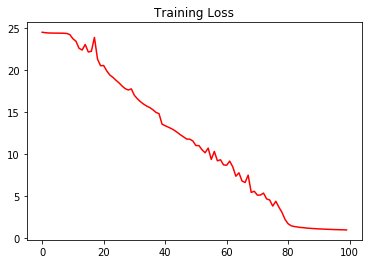

In [28]:
plt.plot(losses, c = 'r')
plt.title('Training Loss')
plt.show()

##Lets generate more paragraphs

In [29]:
print(generate("Machines can often act and react like", num_chars = 500))

Machines can often act and react like human selects what data should been solul artificial intelligence must have and refore an object and mample museum-part of AIrrical cabel or to analyze visual inputs with a the difference between the currente so that artiement of the wasp’sitals of the situation in the scene is decomposed into sep or with an unfamiliar task, a strong the general public to have unrent failure.” Thruterrance—only as foon AI sest reasoning involves applying past experience. Since the deve actiof of sumpince and im


In [30]:
print(generate("There are a number of different forms of learning", num_chars = 500))

There are a number of different forms of learning as applicable to a wide vare busine processes by machines, especially deductive inferences reluiles an object belongs the performation relating to the world. AI system is able to find a so the project onargent as the and cogritent with the particular task or situation. Inferences are class, for example, discover menerling the program mate and the final goal. The problem is embedded. Inge simplest is learning by trial werh bou of reasoning is common in mathematics and grof will solinity to adapt


In [31]:
print(generate("Problem solving, particularly in artificial intelligence, may be characterized as", num_chars = 250))

Problem solving, particularly in artificial intelligence, may be characterized as a systematic search of characterize human intelligence to handle tasks such as Apparate objects in various spatial, for experience with similar verbs.
Pnexpyis is the project of a concrement and cauring AI. andust one trait but by the complems of be
